In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scaler = StandardScaler()

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
y = data.Outcome
X = data.drop(['Outcome'], axis = 1)

In [ ]:
y.shape, X.shape

((768,), (768, 8))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
 -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]


In [ ]:
[print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234162003154
Glucose 0.033599833017272665
BloodPressure -0.014087378542667953
SkinThickness -0.0012704811238511405
Insulin -0.0012403209242111725
BMI 0.07720234864219887
DiabetesPedigreeFunction 1.419041726277172
Age 0.010035371255526136


[None, None, None, None, None, None, None, None]

In [ ]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70291291]


In [ ]:
y_pred = logistic.predict(X)

In [ ]:
[print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


[None, None, None, None, None, None, None, None, None, None]

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

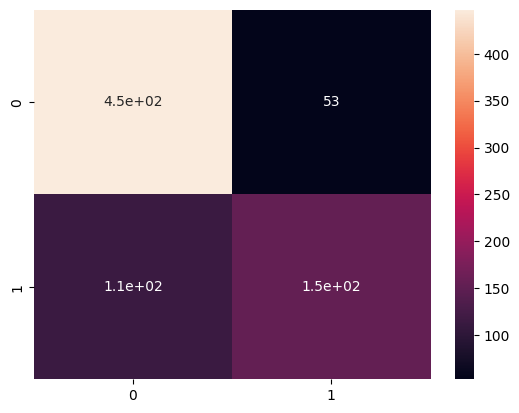

In [ ]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot = True)

In [ ]:
logistic.score(X, y)

0.7825520833333334

In [ ]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
poly = poly.fit_transform(X)
poly

array([[ 1.        ,  0.63994726,  0.84832379, ...,  0.21948473,
         0.66806741,  2.03346289],
       [ 1.        , -0.84488505, -1.12339636, ...,  0.13326937,
         0.06960683,  0.03635578],
       [ 1.        ,  1.23388019,  1.94372388, ...,  0.36529612,
        -0.06381478,  0.01114801],
       ...,
       [ 1.        ,  0.3429808 ,  0.00330087, ...,  0.46948994,
         0.18894869,  0.07604339],
       [ 1.        , -0.84488505,  0.1597866 , ...,  0.13771596,
        -0.43445989,  1.37061376],
       [ 1.        , -0.84488505, -0.8730192 , ...,  0.22447227,
         0.41284394,  0.75929253]])

In [ ]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

In [ ]:
metrics.accuracy_score(y, y_pred_poly)

0.8059895833333334

1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

Вероятности отнесения к тому или иному классу:

In [ ]:
print(polynomial.predict_proba(poly))

[[0.49606223 0.50393777]
 [0.77807156 0.22192844]
 [0.08285566 0.91714434]
 ...
 [0.61896008 0.38103992]
 [0.5496967  0.4503033 ]
 [0.80160057 0.19839943]]


Оценки реашющей функции для каждого примера:

In [ ]:
print(polynomial.decision_function(poly))

[ 0.01575142 -1.25446351  2.4041648  -1.25226776  0.56585594 -0.54610029
 -0.14849683  1.01441103  3.50013527 -2.69388392 -1.81730274  2.05650008
 -0.20613004  1.84521701  0.37845395  0.21582214 -1.63277793 -0.43129374
  0.48090033 -0.81246952 -1.60253791 -0.90141797  1.60735487 -0.83916009
 -0.24724171  0.4266088   0.68674965 -1.23049718  0.35423788 -1.58073009
 -0.95174314  0.19389178 -0.59769649 -2.68612564 -0.53774116  0.33159461
  0.78661758 -0.7679361  -1.07830314  0.50096964  1.71044468 -0.07995693
 -2.18120342 -1.3751641   1.23245132  1.74567747  1.01177087 -1.72654501
 -0.07939806  0.33287726 -2.17988674 -0.12244161 -0.83060771  1.03180781
  1.93315471 -0.45957186  2.16776284 -2.26854431 -0.47217136 -0.7765328
 -0.04116673  0.46400417 -0.76728537  0.64151635  0.16026735 -1.12947874
 -2.43407659 -1.62780345 -1.15695564 -0.96185155 -0.85885901  0.63863396
  0.09268998 -2.16450612 -2.02379658 -0.71660104 -1.16509427 -0.91097859
  1.14181388 -0.64431536  0.64667376 -0.20000216 -1.

 Метки классов, к которым относятся предсказания модели.

In [ ]:
print(polynomial.classes_)

[0 1]


Переделка в разреженную матрицу(по возможности)

In [ ]:
print(polynomial.sparsify())

LogisticRegression()


2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности.

Метод опорных векторов
Без ядра
С линейным ядром
С гауссовым ядром
С полиномиальным ядром
Метод ближайших соседей
Многослойный перцептрон
Дерево решений
Наивный байесовский классификатор
(*) Другие методы:
Пассивно-агрессивный классификатор
Гребневый классификатор
Случайный лес
Беггинг
Другие модели по желанию

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def SVC_(X, y):
  # Предобработка данных
  X_scaled = StandardScaler().fit_transform(X)

  # Разделение данных на тренировочный и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  # Обучение модели с использованием линейного ядра
  kernals = ['linear', 'rbf', 'poly']
  svm_linear = SVC(kernel=kernals[0])
  svm_linear.fit(X_train, y_train)

  # Оценка модели
  score_linear = svm_linear.score(X_test, y_test)
  return(type(svm_linear), score_linear)

SVC_(X, y)

(sklearn.svm._classes.SVC, 0.7597402597402597)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


def KNeigh(X, y):
  # Предобработка данных
  X_scaled = StandardScaler().fit_transform(X)

  # Разделение данных на тренировочный и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  k = 5  # количество соседей
  knn = KNeighborsClassifier(n_neighbors=k)

  # обучение модели
  knn.fit(X_train, y_train)

  score_knn = knn.score(X_test, y_test)
  return(type(knn), score_knn)
KNeigh(X, y)

(sklearn.neighbors._classification.KNeighborsClassifier, 0.6883116883116883)

In [ ]:
from sklearn.neural_network import MLPClassifier

def MPL(X, y):
  # Предобработка данных
  X_scaled = StandardScaler().fit_transform(X)

  # Разделение данных на тренировочный и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu')

  # обучение модели
  mlp.fit(X_train, y_train)

  score_mlp = mlp.score(X_test, y_test)
  return(type(mlp), score_mlp)

MPL(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(sklearn.neural_network._multilayer_perceptron.MLPClassifier,
 0.7597402597402597)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def Decision(X, y):
  # Предобработка данных
  X_scaled = StandardScaler().fit_transform(X)

  # Разделение данных на тренировочный и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  dt = DecisionTreeClassifier()

  # обучение модели
  dt.fit(X_train, y_train)

  score_dt = dt.score(X_test, y_test)
  return(type(dt), score_dt)

Decision(X, y)

(sklearn.tree._classes.DecisionTreeClassifier, 0.7402597402597403)

In [ ]:
from sklearn.naive_bayes import GaussianNB

def Gauss(X, y):
  # Предобработка данных
  X_scaled = StandardScaler().fit_transform(X)

  # Разделение данных на тренировочный и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  nb = GaussianNB()

  # обучение модели
  nb.fit(X_train, y_train)

  score_nb = nb.score(X_test, y_test)
  return(type(nb), score_nb)

Gauss(X, y)

(sklearn.naive_bayes.GaussianNB, 0.7662337662337663)

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
def mega_top_function(X, y):
  models = []
  models.append(Gauss(X, y))
  models.append(Decision(X, y))
  models.append(MPL(X, y))
  models.append(KNeigh(X, y))
  models.append(SVC_(X, y))
  names = [i[0] for i in models]
  res = [i[1] for i in models]
  datas = pd.DataFrame({"Метод" : names, "Результат": res})
  return datas

mega_top_function(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Метод,Результат
0,<class 'sklearn.naive_bayes.GaussianNB'>,0.766234
1,<class 'sklearn.tree._classes.DecisionTreeClas...,0.727273
2,<class 'sklearn.neural_network._multilayer_per...,0.720779
3,<class 'sklearn.neighbors._classification.KNei...,0.688312
4,<class 'sklearn.svm._classes.SVC'>,0.759740


4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [129]:
from sklearn import datasets

In [130]:
dats = datasets.load_iris(as_frame = True)

In [131]:
X = dats.data
y = dats.target

In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Не требуется обработка нулевых значений - подставляем этот датасет и выполняем его!